# Importación de paquetes

In [1]:
import sys
sys.path.append('..')
from modules import preprocess, graphics

Invoking __init__.py for modules


# 1. Transformación de características

In [2]:
# Step 1: Read dataset
df = preprocess.load_csv_data('../dataset/Occupancy_Estimation.csv')

# Step 2: Recode Room_Occupancy_Count column
preprocess.recode_dataset_output(df)

# Step 3: Filter Date and Time columns
preprocess.remove_time_columns(df)

In [3]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


# 2. Limpieza de los datos

## 2.1 Deteción de valores atípicos

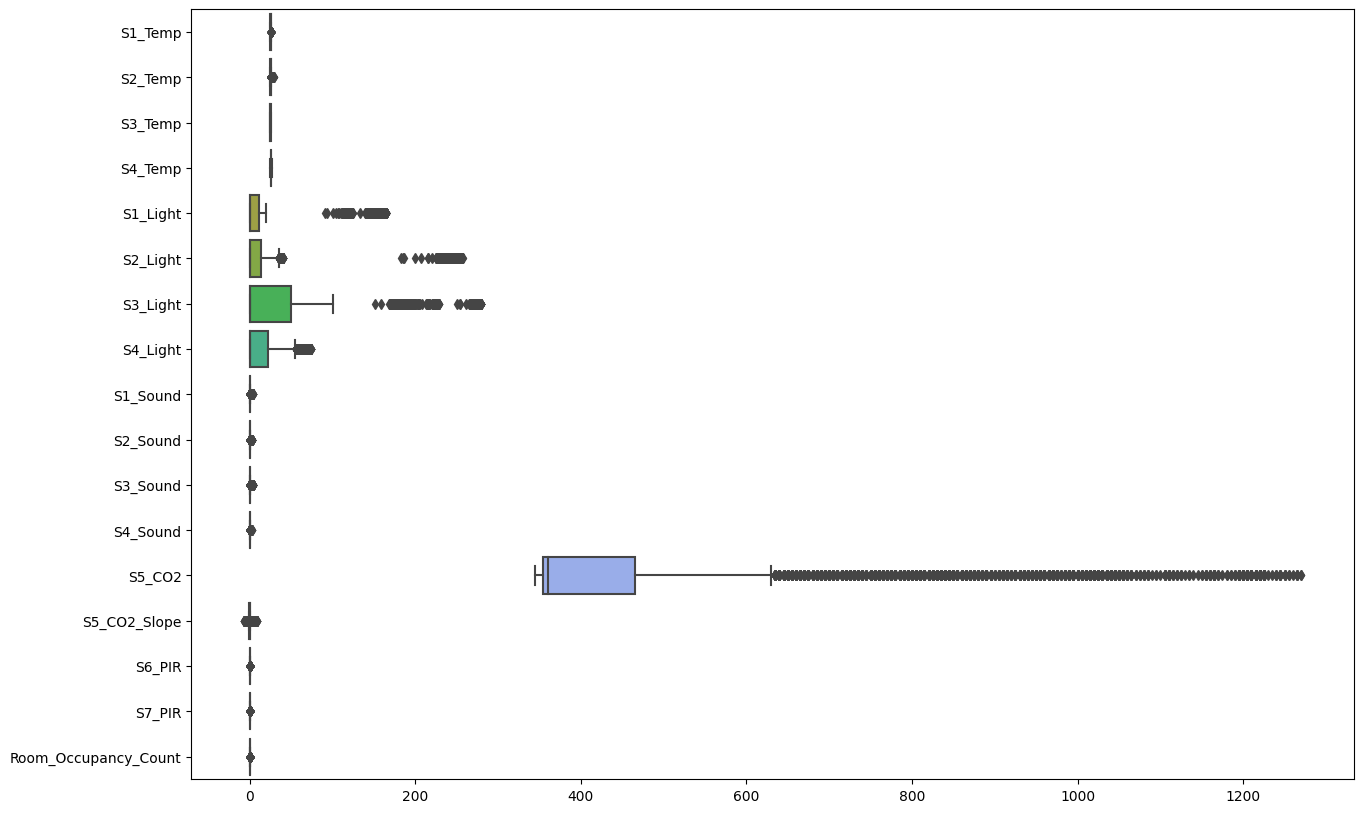

In [4]:
graphics.boxplot_df(df)

### Si_Temp:
- S2_Temp: Tiene *outliers*
- S1_Temp, S3_Temp, S4_Temp: No tienen *outliers*

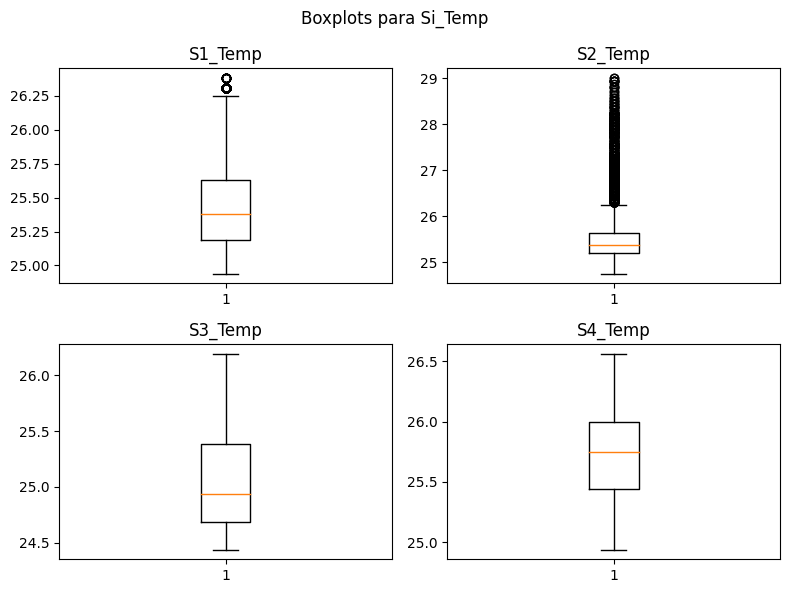

In [5]:
graphics.boxplot_s_temp(df)

### Si_Light:
- S1_Light, S2_Light, S3_Light, S4_Light: Tienen *outliers*

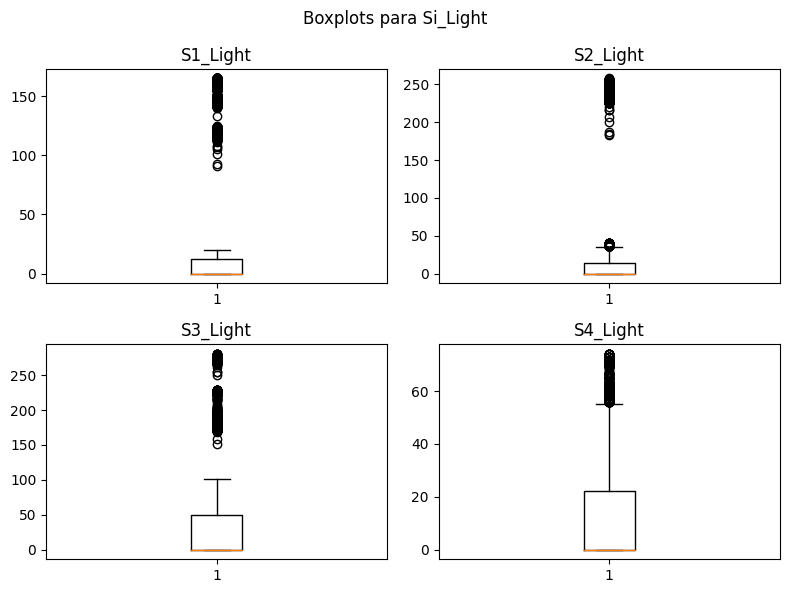

In [6]:
graphics.boxplot_s_light(df)

### Si_Sound:
- S1_Sound, S2_Sound, S3_Sound, S4_Sound: Tienen *outliers*

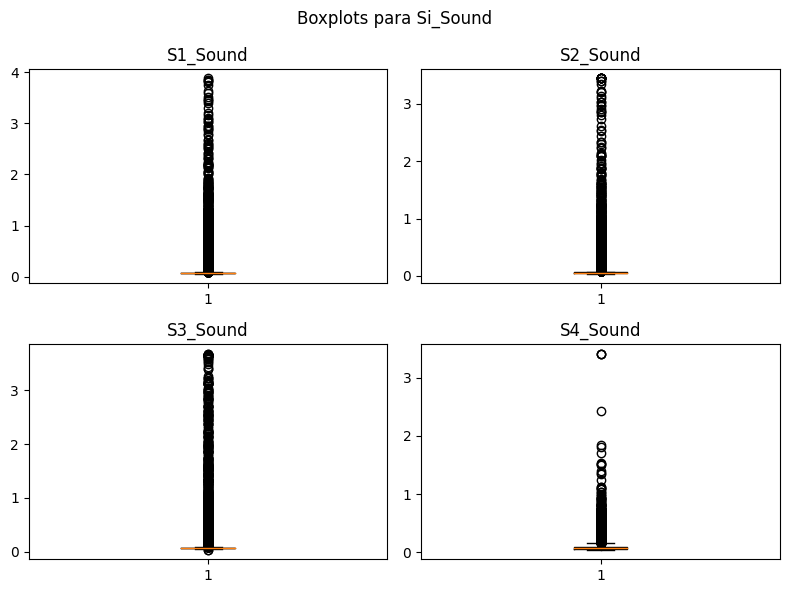

In [7]:
graphics.boxplot_s_sound(df)

### S5_CO2, S5_CO2_Slope:
- S5_CO2, S5_CO2_Slope: Tienen *outliers*

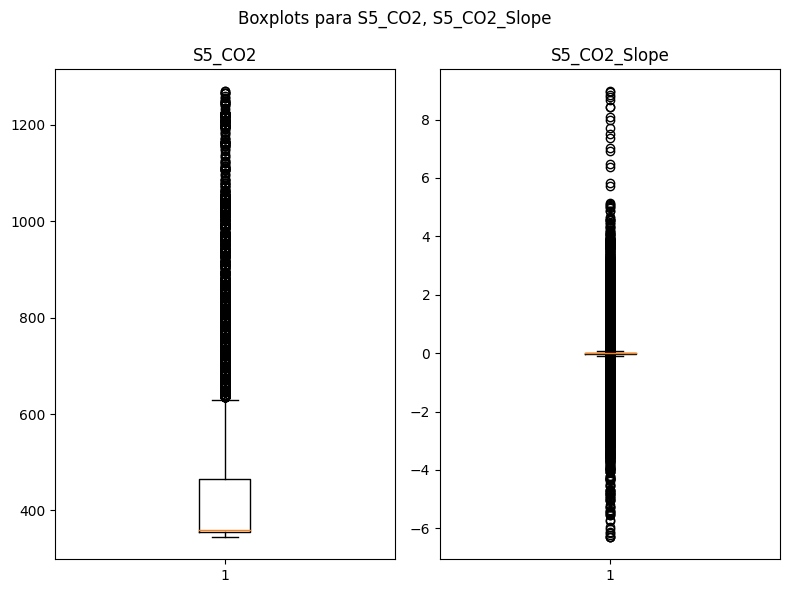

In [8]:
graphics.boxplot_s_co2(df)

### Si_PIR:
- S6_PIR, S7_PIR: Tienen *outliers*

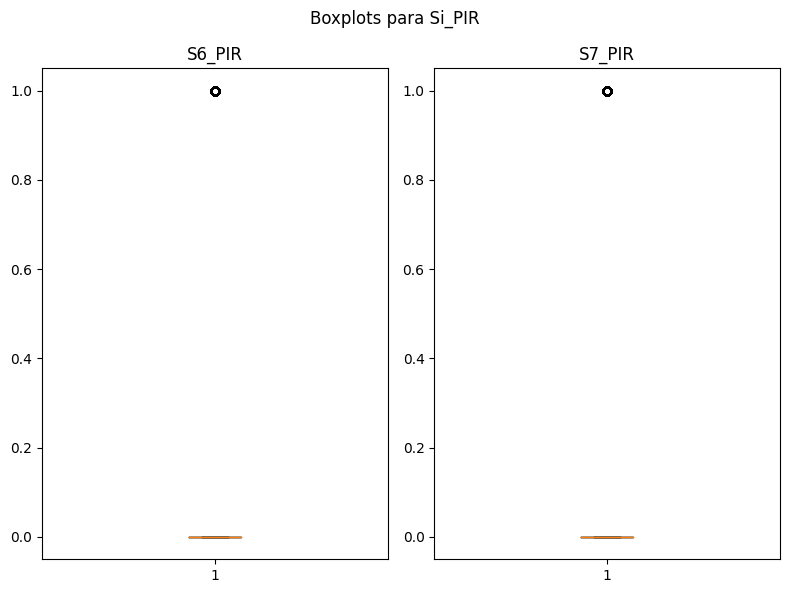

In [9]:
graphics.boxplot_s_pir(df)

#### Características con valores atípicos:

In [10]:
features_with_outliers = preprocess.get_features_with_outliers(df)

Features with outliers:  ['S1_Temp', 'S2_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']


## 2.2 Tratamiento de valores atípicos: *flooring and capping*

In [11]:
preprocess.flooring_and_capping(df, features_with_outliers)

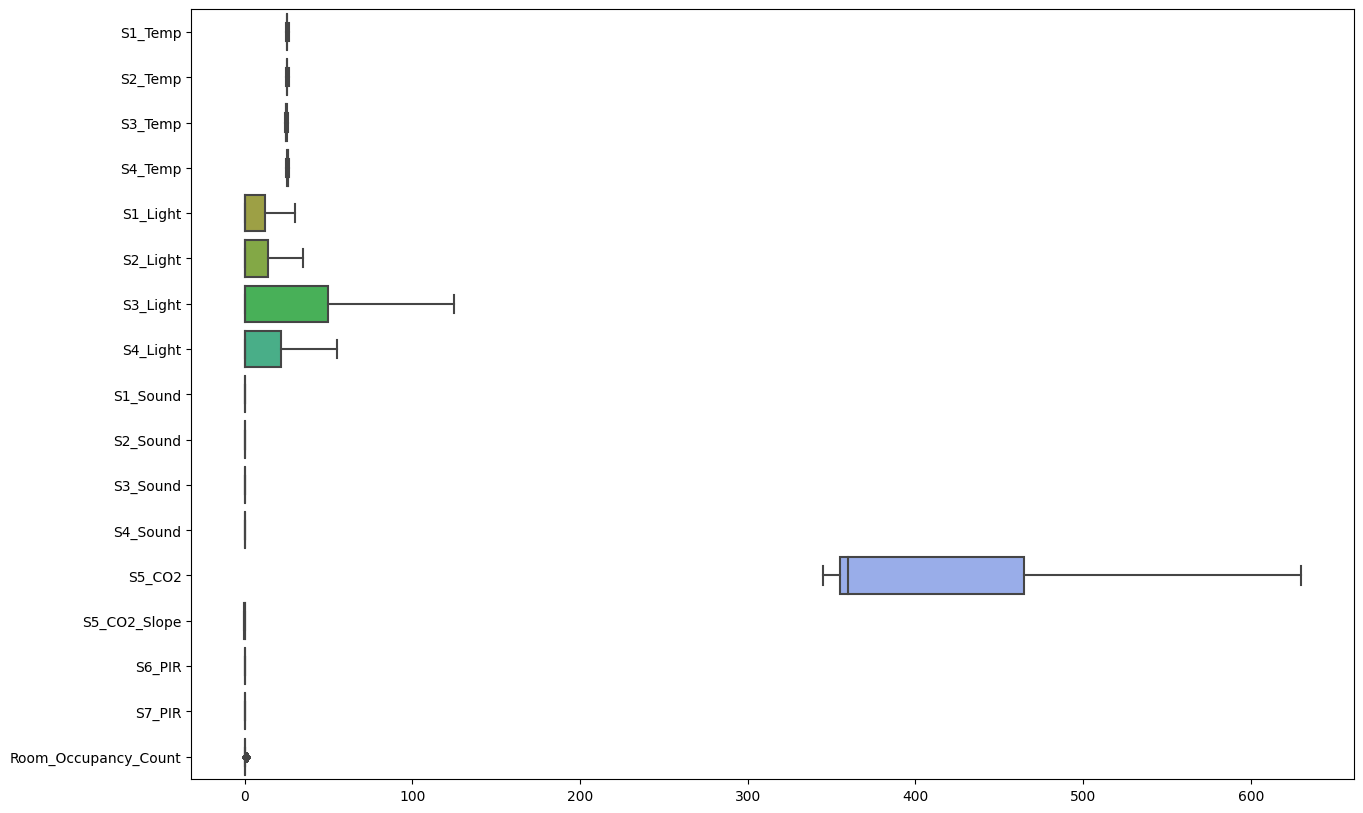

In [12]:
graphics.boxplot_df(df)

### Si_Temp

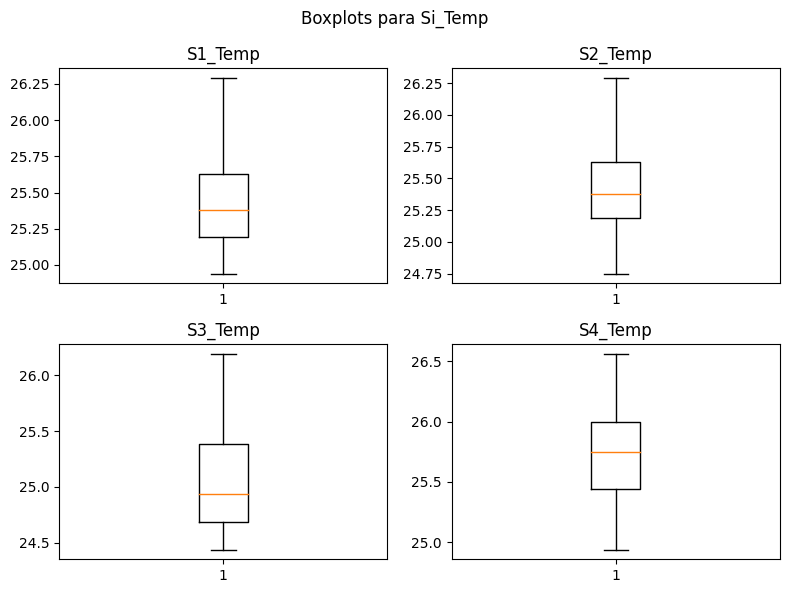

In [13]:
graphics.boxplot_s_temp(df)

### Si_Light

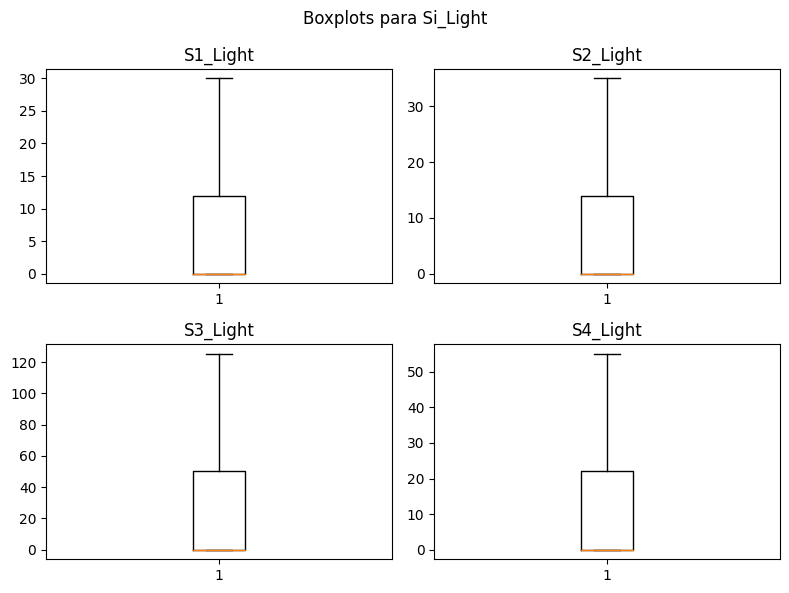

In [14]:
graphics.boxplot_s_light(df)

### Si_Sound

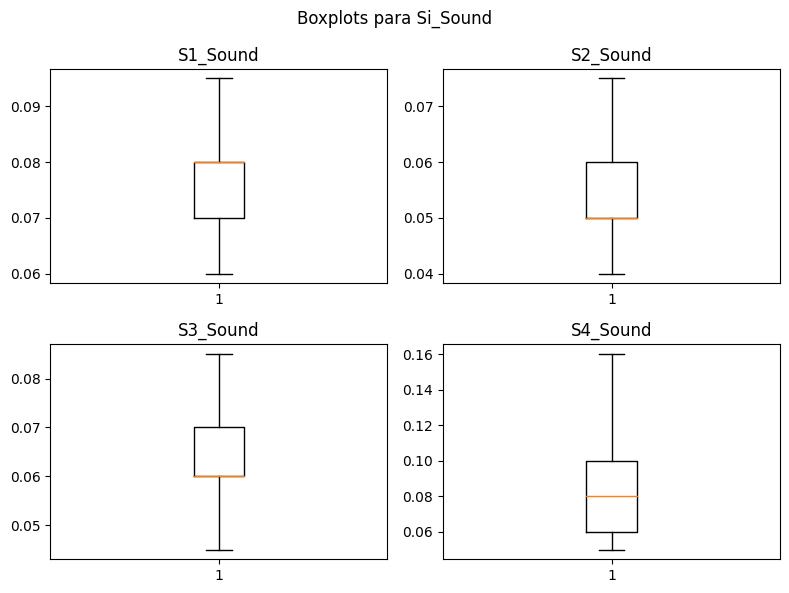

In [15]:
graphics.boxplot_s_sound(df)

### S5_CO2, S5_CO2_Slope

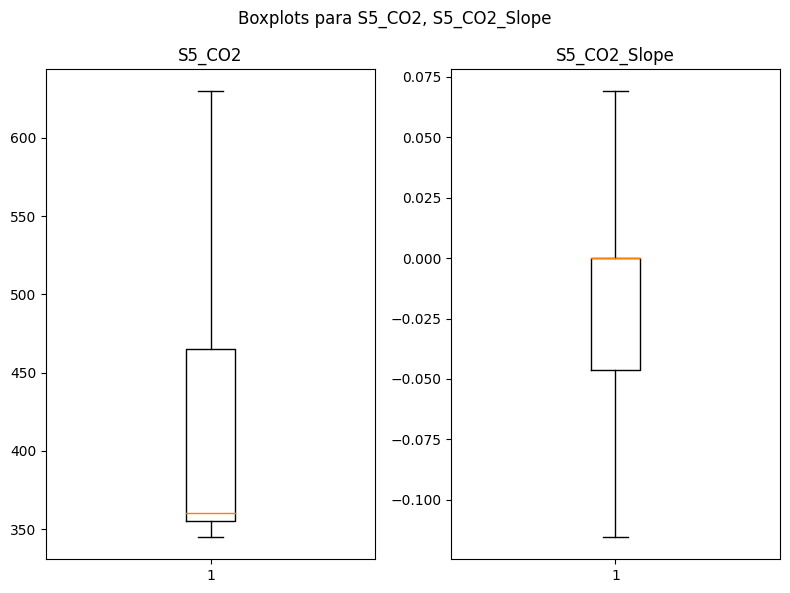

In [16]:
graphics.boxplot_s_co2(df)

### Si_PIR

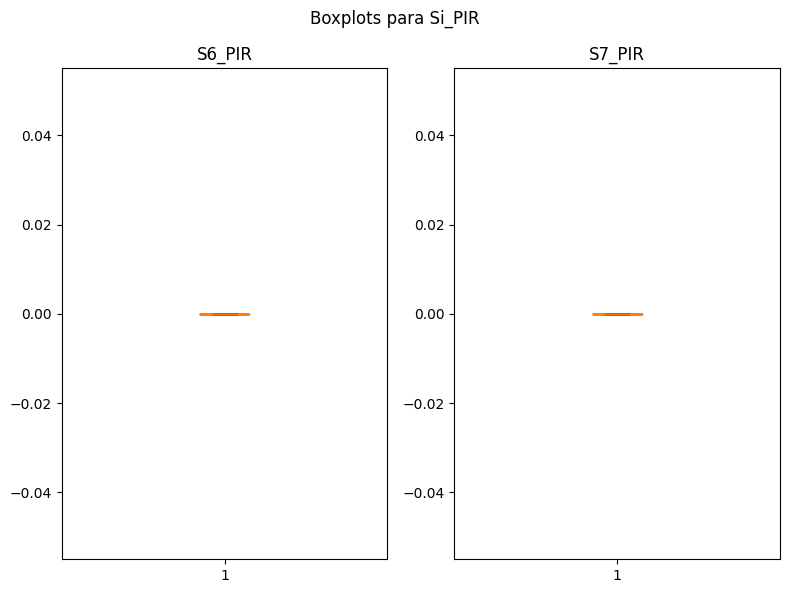

In [17]:
graphics.boxplot_s_pir(df)

## 2.3 Eliminación de duplicados

In [18]:
preprocess.get_number_duplicated_rows(df)

Number of duplicated rows: 1789


In [19]:
preprocess.delete_duplicates(df)

The shape of the data set before dropping duplicated:(10129, 17)
The shape of the data set after dropping duplicated:(8340, 17)


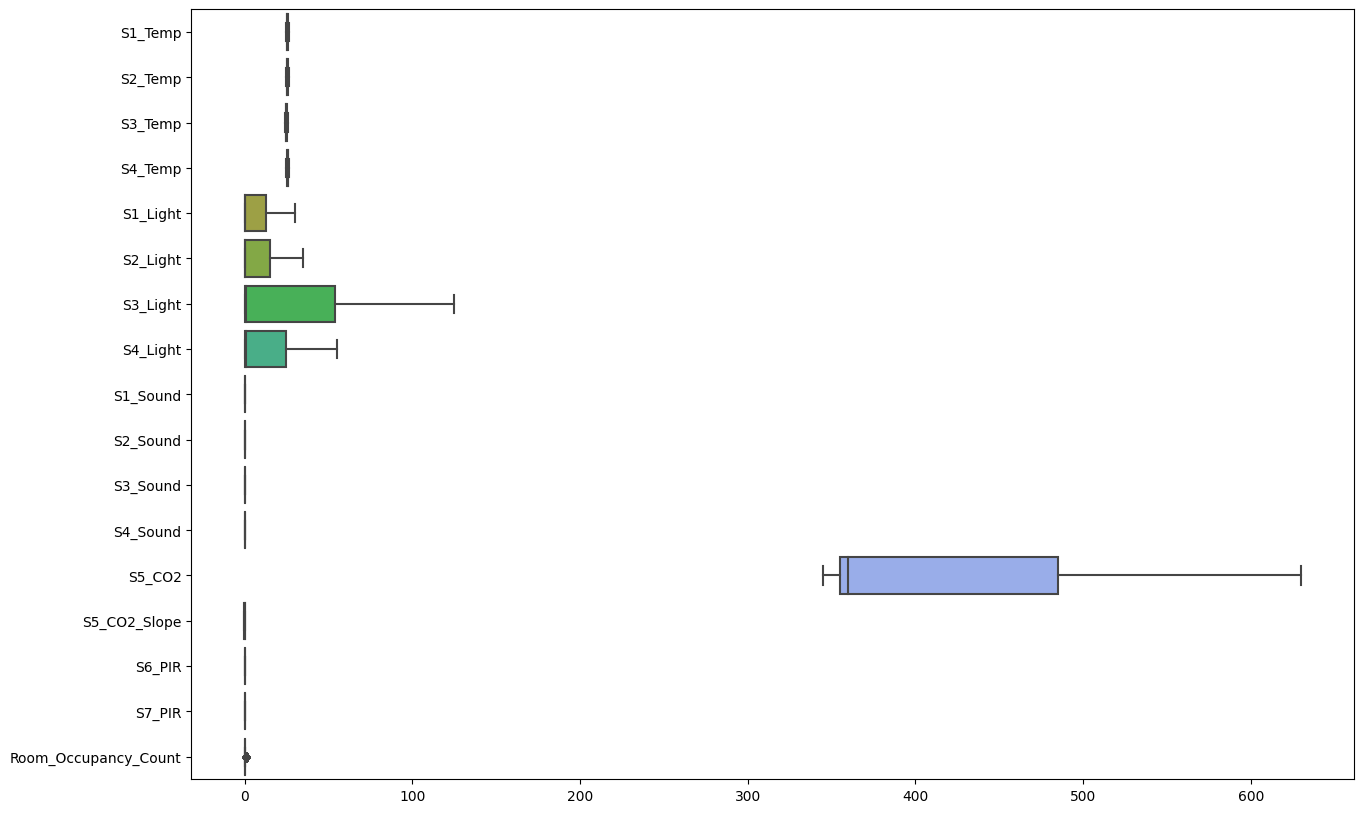

In [20]:
graphics.boxplot_df(df)